In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn import metrics

In [53]:
iris = datasets.load_iris()
X = iris.data
print(X.shape)
dataset = pd.read_csv('IRIS.csv')
Y = dataset.iloc[:, 0:4].values
print(Y.shape)

(150, 4)
(150, 4)


In [45]:
#Condensed distance matrix

row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')
print(row_clusters.shape)

df=pd.DataFrame(row_clusters,
             columns=list(['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.']),
             index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])


(149, 4)


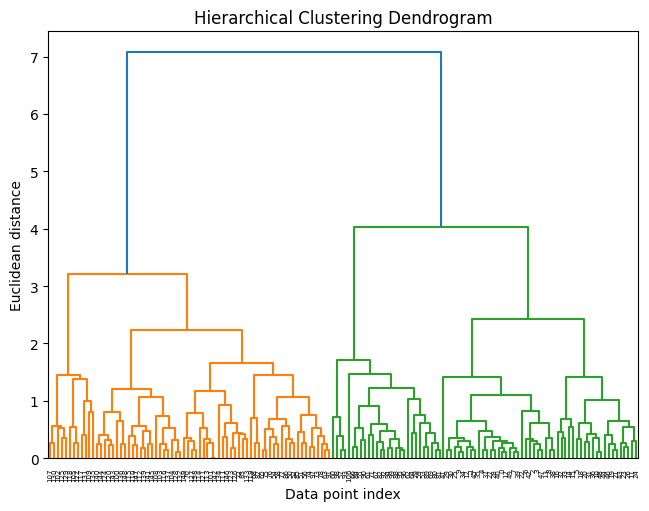

In [46]:
row_dendr = sch.dendrogram(row_clusters)
plt.tight_layout()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Euclidean distance')
plt.show()

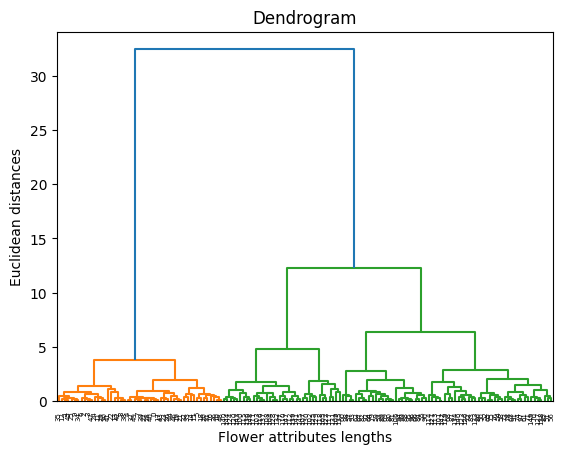

In [25]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Flower attributes lengths')
plt.ylabel('Euclidean distances')
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
y_hc = hc.fit_predict(X)

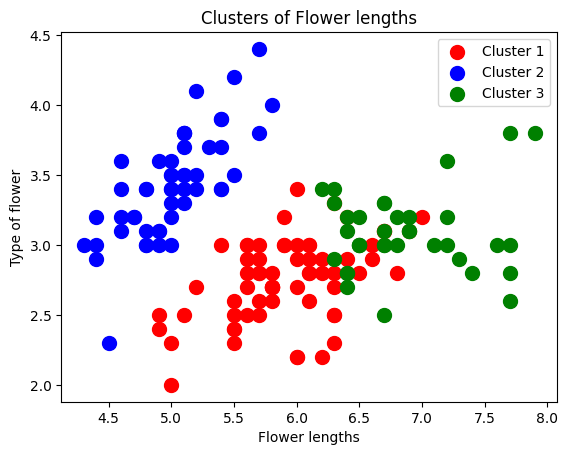

In [63]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Flower lengths')
plt.xlabel('Flower lengths')
plt.ylabel('Type of flower')
plt.legend()
plt.show()

#we can see here that we have 3 different clusters. 

In [64]:
ac = AgglomerativeClustering(n_clusters=3, # chose 3 since we know the iris dataset has three different species
                             metric='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print(f'Cluster labels: {labels}')
#we can see that there are three cluster groups in this metrics. 

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [65]:
# Calculate the evaluation metrics
ari = metrics.adjusted_rand_score(iris.target, labels)
silhouette = metrics.silhouette_score(X, labels)
completeness = metrics.completeness_score(iris.target, labels)

# Print the evaluation metrics
print("Adjusted Rand Index (ARI):", ari)
print("Silhouette Score:", silhouette)
print("Completeness Score:", completeness)

#the completeness score is 0.74, which is pretty good. This is the range we're looking at. 

Adjusted Rand Index (ARI): 0.6422512518362898
Silhouette Score: 0.5135953221192214
Completeness Score: 0.7454382753016927
